In [1]:
# -*- coding: utf-8 -*-
import numpy as np
from keras.models import load_model
from PIL import Image
import os
import random
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import interpolate

random.seed(43)
plt.style.use(['science', 'grid', 'no-latex'])  # 启用科学风格
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.rc('font', family='Times New Roman')


# 数据预处理
def process(train_y):
    print('process data\n')  # 服务器进度展示

    # y归一化到[0,1]
    train_max = np.max(train_y, axis=0)
    train_min = np.min(train_y, axis=0)
    for i in range(train_y.shape[1]):
        train_y[:, i] = (train_y[:, i] - train_min[i]) / (train_max[i] - train_min[i])

    return train_y


def load_data():
    print('load  data')
    ## 载入测试集的x
    count = -1
    final_test_data = np.zeros([344, 64, 64, 64, 1])
    for cycleTiff in range(357):
        filename = "/home/guozy/Ni-YSZ_CNN/predict/anode_stacks_15000/" + str(cycleTiff + 1) + ".tiff"
        if os.path.exists(filename) == False:
            continue
        count = count + 1
        img = Image.open(filename)
        for i in range(img.n_frames):  # 可以用img.n_frames来得到总页数
            try:
                img.seek(i)  # 是否存在
                final_test_data[count, :, :, i, 0] = img
            except EOFError:  # 页数读完了
                break

    # 载入测试集的y
    with open("/home/guozy/Ni-YSZ_CNN/predict/Results_15000_predict.txt", "r") as f:
        line = f.readline()
        label_list = []
        while line:
            num = list(map(float, line.split()))
            label_list.append(num)
            line = f.readline()
        f.close()
        final_test_label = np.array(label_list)

    return final_test_data, final_test_label


# 载入选择的模型
def get_model(name=None):
    if name == None:

        print('avaliable model:')
        print('-' * 10)
        filepath = '/home/guozy/Ni-YSZ_CNN/model/'
        subpath = os.listdir(filepath)
        count = -1
        for p in subpath:
            count += 1
            print('{},{}'.format(count, p))
        print('-' * 10)

        choice = int(input('input the number of the determined model\n'))
        filepath = filepath + subpath[choice] + '/model.h5'
        print('load model')
        model = load_model(filepath, compile=False)  # 根据具体读取模型地址修改

    else:
        filepath = '/home/guozy/Ni-YSZ_CNN/model/' + name + '/model.h5'
        model = load_model(filepath, compile=False)  # 根据具体读取模型地址修改

    return model

In [ ]:
# 画数据集分布图来说明L属性的预测误差大 

# 载入训练集的label数据
def load_label():
    print('load label\n')  # 服务器进度展示

    # 载入训练集的y
    with open("/home/guozy/Ni-YSZ_CNN/train/Results_all.txt", "r") as f:
        line = f.readline()
        label_list = []
        while line:
            num = list(map(float, line.split()))
            label_list.append(num)
            line = f.readline()
        f.close()
        train_y = np.array(label_list)
        
    return train_y


# 展示数据集的label
def show_label(train_y, name):
    print('show label\n')  # 服务器进度展示
    plt.figure(dpi=800,figsize=(15,10))
    palette = plt.get_cmap('tab20c')  # 'Pastel2') # 'Set1'
    
    x_label=[r'$E$ (MPa)',r'${N}$ (-)',r'$G$ (MPa)',r'CTE (K$^{-1}$)',r'$L_{\rm{TPB}}$ ($\rm{{\mu}m^{-2}}$)']
    
    for i in range(5):
        ax=plt.subplot(3, 2, i+1)
        sns.histplot(train_y[:, i], kde=True, shrink=0.8, bins=20, color=palette.colors[4*i])
        plt.xlabel(x_label[i],{'size' : 12})
        plt.ylabel('Count',{'size' : 12})
    
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None,wspace=0.17, hspace=0.40)
    plt.suptitle(name, fontsize=22,x=0.51,y=0.93)
    plt.savefig('/home/guozy/Ni-YSZ_CNN/train/' + name + '.jpg')  # 保存训练过程的图片


# 展示归一化后数据集的label
def show_nol_label(train_y, name):
    print('show normalzation label\n')  # 服务器进度展示
    plt.figure(dpi=800,figsize=(15,10))
    palette = plt.get_cmap('tab20c')  # 'Pastel2') # 'Set1'
    
    
    x_label = [r'$E^{\prime}$',r'${N}^{\prime}$',r'$G^{\prime}$',r'CTE$^{\prime}$',r'$L_{\rm{TPB}}^{\prime}$']
    
    for i in range(5):
        ax=plt.subplot(3, 2, i+1)
        sns.histplot(train_y[:, i], kde=True, shrink=0.8, bins=20, color=palette.colors[4*i])
        plt.xlabel(x_label[i],{'size' : 12})
        plt.ylabel('Count',{'size' : 12})
    
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None,wspace=0.17, hspace=0.40)
    plt.suptitle(name, fontsize=22,x=0.51,y=0.93)
    plt.savefig('/home/guozy/Ni-YSZ_CNN/train/' + name + '.jpg')  # 保存训练过程的图片


train_y= load_label()  # 载入训练集和数据集的数据
# show_label(train_y, 'Distribution of properties in Training Dataset')
# show_label(test_y, 'Distribution of properties in Testing Dataset')
train_y = process(train_y)
show_nol_label(train_y, 'Normalized Distribution of properties in Training Dataset')

load  data


2023-04-19 13:00:00.072237: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-19 13:00:01.792624: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22193 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:d5:00.0, compute capability: 8.6
2023-04-19 13:00:01.802997: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 22301 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:f5:00.0, compute capability: 8.6
2023-04-19 13:00:02.849325: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the ML

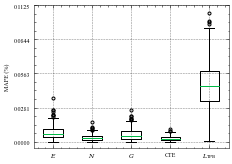

In [2]:
# 画箱线图来证明WMAPE的优越性
test_x, test_y = load_data()

def show_mape_box(test_x, test_y):
    plt.rcParams['boxplot.flierprops.markersize'] = 3  # 默认为6
    max_min_nor = np.array(
        [[1.65219166e+05, 4.88838187e+04], [2.84213381e-01, 2.07984799e-01], [6.37954456e+04, 1.68850886e+04],
         [1.58147200e-05, 1.19209400e-05], [1.34268741e+01, 4.93731340e+00]])

    plt.figure()
    model = get_model('neither')
    pred = np.array(model.predict(test_x), dtype='float64')

    mape = np.zeros([len(test_x), 5])
    for j in range(5):
        pred[:, j] = pred[:, j] * (max_min_nor[j, 0] - max_min_nor[j, 1]) + max_min_nor[j, 1]
        for i in range(len(test_x)):
            mape[i, j] = np.abs(pred[i, j] - test_y[i, j]) / np.abs(test_y[i, j])

    ax = plt.subplot()
    x_label = [r'$E$',r'${N}$',r'$G$',r'CTE',r'$L_{\rm{TPB}}$']
    ax.boxplot([mape[:, 0], mape[:, 1], mape[:, 2], mape[:, 3], mape[:, 4]], autorange=True)

    plt.yticks(np.linspace(0, 0.1125, 5), size=6)
    ax.set_xticklabels(labels=x_label, fontsize=6)
    plt.ylabel('MAPE (%)', size=6)
    plt.savefig('/home/guozy/Ni-YSZ_CNN/Figure_6.jpg', dpi=600)

show_mape_box(test_x, test_y)

In [ ]:
# 载入数据并数据增强
def both(xi,choice):
    x_aug = np.zeros([1, 64, 64, 64, 1])  # 增强后的样本x
    
    # 分12种情况进行讨论
    if choice == 1:  # x轴为对称轴
        for i in range(64):
            x_aug[0, :, :, i, 0] = np.flip(xi[:, :, i, 0], axis=0)

    elif choice == 2: # y轴为对称轴
        for i in range(64):
            x_aug[0, :, :, i, 0] = np.flip(xi[:, :, i, 0], axis=1)

    elif choice == 3: # z轴为对称轴
        for i in range(64):
            x_aug[0, i, :, :, 0] = np.flip(xi[i, :, :, 0], axis=1)
    
    elif choice == 4:
        for i in range(64):
            x_aug[0, i, :, :, 0] = np.rot90(xi[i, :, :, 0], 1)

    elif choice == 5:
        for i in range(64):
            x_aug[0, i, :, :, 0] = np.rot90(xi[i, :, :, 0], 2)

    elif choice == 6:
        for i in range(64):
            x_aug[0, i, :, :, 0] = np.rot90(xi[i, :, :, 0], 3)

    elif choice == 7:
        for i in range(64):
            x_aug[0, :, i, :, 0] = np.rot90(xi[:, i, :, 0], 1)

    elif choice == 8:
        for i in range(64):
            x_aug[0, :, i, :, 0] = np.rot90(xi[:, i, :, 0], 2)

    elif choice == 9:
        for i in range(64):
            x_aug[0, :, i, :, 0] = np.rot90(xi[:, i, :, 0], 3)

    elif choice == 10:
        for i in range(64):
            x_aug[0, :, :, i, 0] = np.rot90(xi[:, :, i, 0], 1)

    elif choice == 11:
        for i in range(64):
            x_aug[0, :, :, i, 0] = np.rot90(xi[:, :, i, 0], 2)

    elif choice == 12:
        for i in range(64):
            x_aug[0, :, :, i, 0] = np.rot90(xi[:, :, i, 0], 3)

    return x_aug # (1, 64, 64, 64, 1)


def aug_data(x, y):
    print('augment data in all ways\n')
    total = x.shape[0]  # 总共有多少幅图
    x_aug = np.zeros([total * 12, 64, 64, 64, 1],dtype=np.float32)  # 增强后的样本x
    y_aug = y

    for i in range(1,13): # 共12种方法
        for j in range(total): # 共total幅图
            xj = x[j, :, :, :, :]  # 得到第i个样本
            x_aug[(i-1) * total + j, :, :, :, :] = both(xj, i)
        y_aug= tf.concat([y_aug, y], axis=0)
    x_aug = tf.concat([x, x_aug], axis=0)

    return x_aug.numpy(), y_aug.numpy()

# 载入数据
test_x, test_y = load_data()
test_x, test_y = aug_data(test_x, test_y)

In [22]:
# 计算每个label的每个method的WMAPE
def show_wampe(test_x, test_y):
    my_wampe = np.zeros([5, 4])

    max_min_nor = np.array(
        [[1.65219166e+05, 4.88838187e+04], [2.84213381e-01, 2.07984799e-01], [6.37954456e+04, 1.68850886e+04],
         [1.58147200e-05, 1.19209400e-05], [1.34268741e+01, 4.93731340e+00]])

    for i in range(4):
        if i == 0:
            label = "both"
        elif i == 1:
            label = "rotate"
        elif i == 2:
            label = "flip"
        elif i == 3:
            label = "neither"
        model = get_model(label)
        pred_y = np.array(model.predict(test_x))

        for j in range(5):
            pred = pred_y[:, j] * (max_min_nor[j, 0] - max_min_nor[j, 1]) + max_min_nor[j, 1]
            my_wampe[j, i] = np.sum(np.abs(pred - test_y[:, j])) * 100 / np.sum(np.abs(test_y[:, j]))


    for i in range(5):
        print(i + 1)
        print(my_wampe[i, :], '\n')

    return my_wampe

my_wampe = show_wampe(test_x, test_y)

1
[1.24368897 1.18564008 2.01524496 5.02860929] 

2
[1.19082498 1.28830863 1.24469714 2.34468264] 

3
[1.36432628 1.31178919 2.09770827 5.38124013] 

4
[1.3724841  1.4818635  1.72732041 3.89984033] 

5
[3.3348852  3.45269949 4.35337071 9.15889678] 



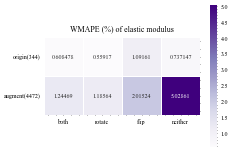

In [5]:
# 画热力图
def show_wmape_heatmap():
    plt.figure()
    data = [
            [0.608478, 0.55917, 1.09161, 0.737147],
            [1.244689, 1.18564, 2.01524, 5.028609]
           ]
    xtick = ['both', 'rotate', 'flip', 'neither']
    ytick = ['origin(344)', 'augment(4472)']
    h = sns.heatmap(data, fmt='g', cmap="Purples", annot=True, cbar=True,
                    xticklabels=xtick, yticklabels=ytick, linewidths=1, square=True, annot_kws={"fontsize": 6})
    plt.title('WMAPE (%) of elastic modulus', fontdict={"size": 8})
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
    cbar = h.collections[0].colorbar
    cbar.ax.tick_params(labelsize=6)
    h.set_xticklabels(h.get_xticklabels(), rotation=0)
    h.set_yticklabels(h.get_yticklabels(), rotation=0)
    plt.savefig("/home/guozy/Ni-YSZ_CNN/Figure_1.jpg", dpi=1000)

show_wmape_heatmap()

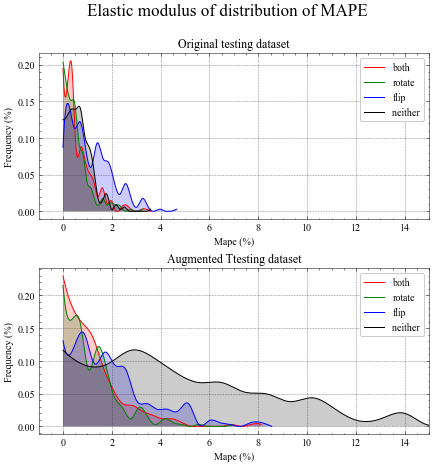

In [8]:
# 画MAPE分布图，感觉有点重复
def show_mape_density():

    data = pd.read_excel('/home/guozy/Ni-YSZ_CNN/mape_density.xlsx',header=0)
    label = ['both', 'rotate', 'flip', 'neither']
    color = ['red','green','blue','k']
    bins_num = 21
    
    plt.figure(figsize=(7, 7))
    
    for i in range(1,3): # 两幅图
        plt.subplot(2,1,i)
        for j in range(4): # 每幅图4条曲线
            mape = data.iloc[:,(i-1)*4+j] * 100
            mape_max = np.max(mape)
            bins_contain = mape_max/(bins_num-1)
            
            x = np.zeros([bins_num])
            y = np.zeros([bins_num])

            for k in range(bins_num):
                x[k] = (0+k) * bins_contain

            for k in range(len(mape)):
                y[int(mape[k] // bins_contain)] += 1


            f = interpolate.interp1d(x, y, kind="cubic")
            
            x_show=np.linspace(0,mape_max,1000)
            y_show = f(x_show)
            y_show = np.maximum(y_show, 0)
            y_show = y_show / data.shape[0]
            
            plt.plot(x_show,y_show,label=label[j],color=color[j])
            plt.fill_between(x_show, 0, y_show, facecolor=color[j], alpha=0.2)
            plt.xlim([-1,15])
        
        
        if i ==1 :
            plt.title('Original testing dataset')
        else :
            plt.title('Augmented Ttesting dataset')
        
        plt.xlabel('Mape (%)')
        plt.ylabel('Frequency (%)')
        plt.legend()
        
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
    
    plt.suptitle('Distribution of MAPE of elastic modulus',fontsize=17)
    plt.savefig('/home/guozy/Ni-YSZ_CNN/Figure_'+str(3)+'.jpg',dpi=1000)

show_mape_density()

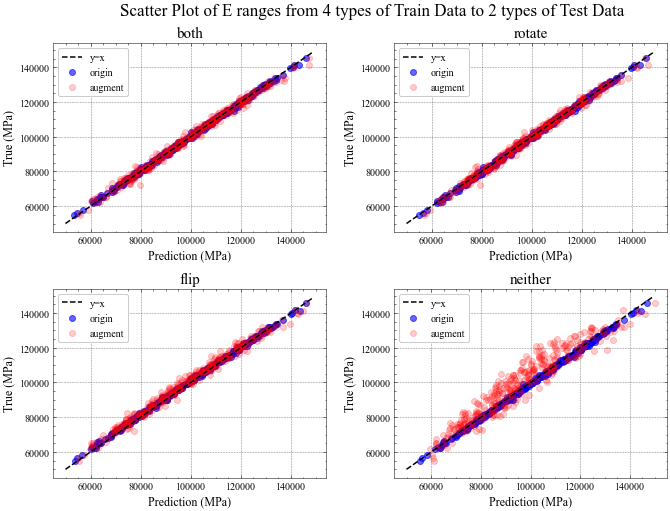

In [22]:
# 画实际-预测散点图
def show_mae_scatter(test_x, test_y):
    max_min_nor = np.array(
        [[1.65219166e+05, 4.88838187e+04], [2.84213381e-01, 2.07984799e-01], [6.37954456e+04, 1.68850886e+04],
         [1.58147200e-05, 1.19209400e-05], [1.34268741e+01, 4.93731340e+00]])

    plt.figure(figsize=(11, 8))
    for i in range(4):
        if i == 0:
            label = "both"
        elif i == 1:
            label = "rotate"
        elif i == 2:
            label = "flip"
        elif i == 3:
            label = "neither"
        model = get_model(label)
        plt.subplot(2, 2, i + 1)

        # 画直线
        line = range(50000,150000,1000)
        plt.plot(line,line,color = 'k',linestyle='--',linewidth=1.5,label='y=x')

        # 原始数据点的散点图
        pred_y = np.array(model.predict(test_x[0:344, :, :, :, :]), dtype='float64')
        pred_y[:, 0] = pred_y[:, 0] * (max_min_nor[0, 0] - max_min_nor[0, 1]) + max_min_nor[0, 1]
        plt.scatter(pred_y[:, 0], test_y[0:344, 0], alpha=0.6, c='b',label = 'origin')

        # 增强数据点的散点图
        pred_y = np.array(model.predict(test_x[344:, :, :, :, :]), dtype='float64')
        pred_y[:, 0] = pred_y[:, 0] * (max_min_nor[0, 0] - max_min_nor[0, 1]) + max_min_nor[0, 1]
        plt.scatter(pred_y[:, 0], test_y[344:, 0], alpha=0.2, c='r',label = 'augment')

        plt.title(label,fontsize=15)
        plt.xlabel('Prediction (MPa)',{'size':12})
        plt.ylabel('True (MPa)',{'size':12})
        plt.legend()
        
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.25, hspace=0.3)
    plt.suptitle('Scatter Plot of E ranges from 4 types of Train Data to 2 types of Test Data ', fontsize=17, x=0.53,
                 y=0.95)  # 添加标题
    plt.savefig("/home/guozy/Ni-YSZ_CNN/Figure_4.png", dpi=500)

show_mae_scatter(test_x, test_y)


In [ ]:
# 画对比箱线图，没用上
def show_mae_box(test_x, test_y):
    max_min_nor = np.array(
        [[1.65219166e+05, 4.88838187e+04], [2.84213381e-01, 2.07984799e-01], [6.37954456e+04, 1.68850886e+04],
         [1.58147200e-05, 1.19209400e-05], [1.34268741e+01, 4.93731340e+00]])

    plt.figure(figsize=(7, 6))
    for i in range(4):
        if i == 0:
            label = "both"
        elif i == 1:
            label = "rotate"
        elif i == 2:
            label = "flip"
        elif i == 3:
            label = "neither"
        model = get_model(label)

        ax = plt.subplot(2, 2, i + 1)
        pred_y1 = np.array(model.predict(test_x[0:344, :, :, :, :]), dtype='float64')
        pred_y1[:, 0] = pred_y1[:, 0] * (max_min_nor[0, 0] - max_min_nor[0, 1]) + max_min_nor[0, 1]

        pred_y2 = np.array(model.predict(test_x[344:, :, :, :, :]), dtype='float64')
        pred_y2[:, 0] = pred_y2[:, 0] * (max_min_nor[0, 0] - max_min_nor[0, 1]) + max_min_nor[0, 1]

        plt.boxplot([np.abs(pred_y1[:, 0] - test_y[0:344, 0]), np.abs(pred_y2[:, 0] - test_y[344:, 0])])
        ax.set_xticklabels(['original', 'augment'])
        plt.title(label)
        plt.ylabel('MPa')
        plt.ylim([-500,20000])
    
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.35, hspace=None)
    plt.suptitle('MAE of E ranges from 4 types of Train Data to 2 types of Test Data ', fontsize=15, x=0.5,
                 y=0.98)  # 添加标题
    plt.savefig("/home/guozy/Ni-YSZ_CNN/Figure_5.png", dpi=500)

show_mae_box(test_x, test_y)